In [257]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability (13).csv


In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


1. Прочитать данные

In [259]:
df = pd.read_csv('water_potability.csv')
print("Количество строк, количество столбцов:")
df.shape

Количество строк, количество столбцов:


(3276, 10)

In [260]:
print("Первые строки:")
df.head()

Первые строки:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [261]:
print("Последние строки:")
df.tail()

Последние строки:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


2. Провести разведочный анализ данных (EDA): Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.


In [262]:
print("Информация о датасете:")
df.info()
print("Основные статистики:")
display(df.describe())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
Основные статистики:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [263]:
print("Баланс классов:")
print(df['Potability'].value_counts())

Баланс классов:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [264]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


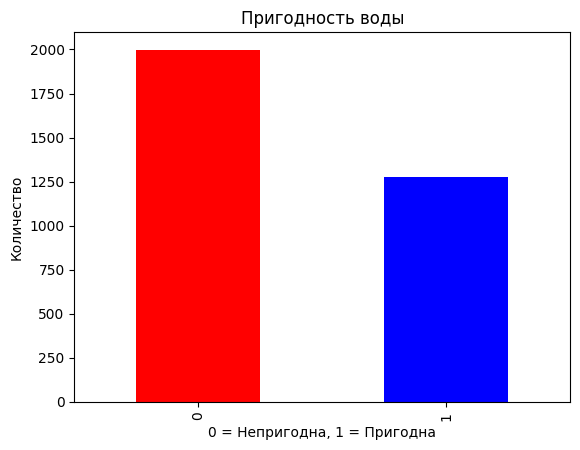

In [265]:
df['Potability'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Пригодность воды')
plt.xlabel('0 = Непригодна, 1 = Пригодна')
plt.ylabel('Количество')
plt.show()

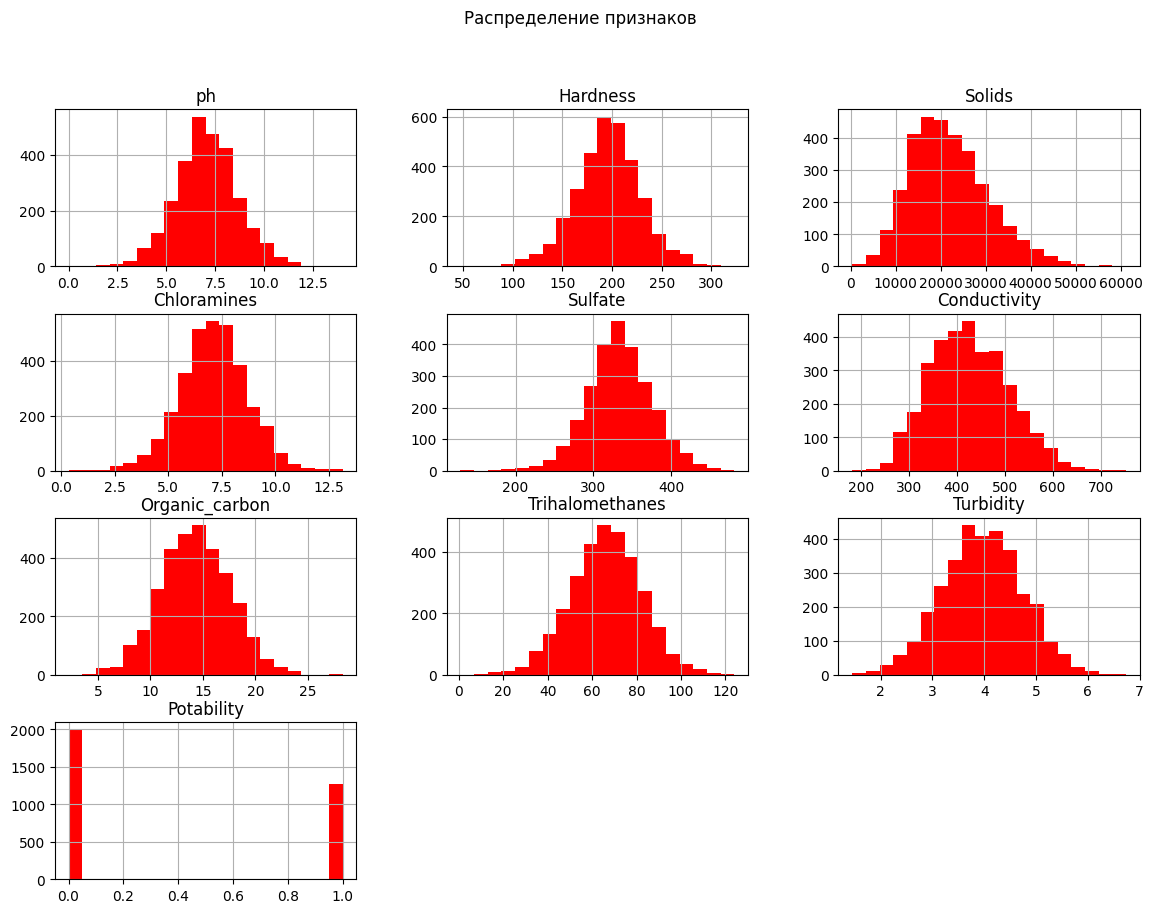

In [266]:
df.hist(bins=20, figsize=(14, 10), color='red')
plt.suptitle('Распределение признаков')
plt.show()

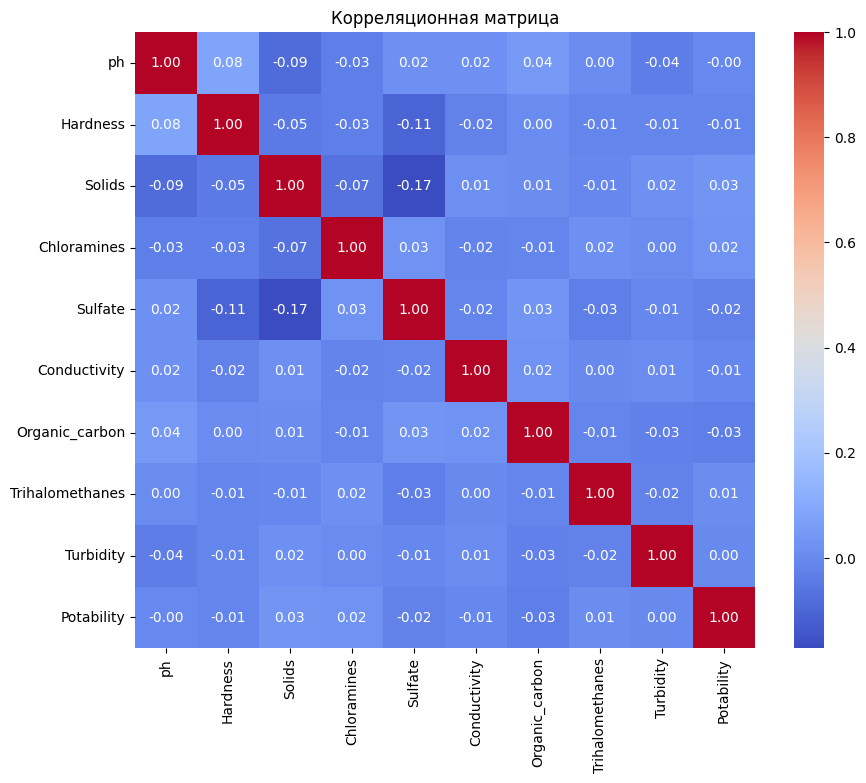

In [267]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

3 Обработать пропущенные значения (или убедиться, что их нет)

In [268]:
print("Пропущенные значения до:")
print(df.isnull().sum())

df = df.fillna(df.median())

print("После заполнения медианой:")
print(df.isnull().sum())

Пропущенные значения до:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
После заполнения медианой:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


4. Обработать категориальные признаки - Не делаю, тк все признаки числовые



5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)




Среднее до: ph            7.07
Solids    22014.09
dtype: float64
Среднее после: ph        0.0
Solids   -0.0
dtype: float64
Стандартное отклонение после: ph        1.000153
Solids    1.000153
dtype: float64


Text(0.5, 1.0, 'После нормализации')

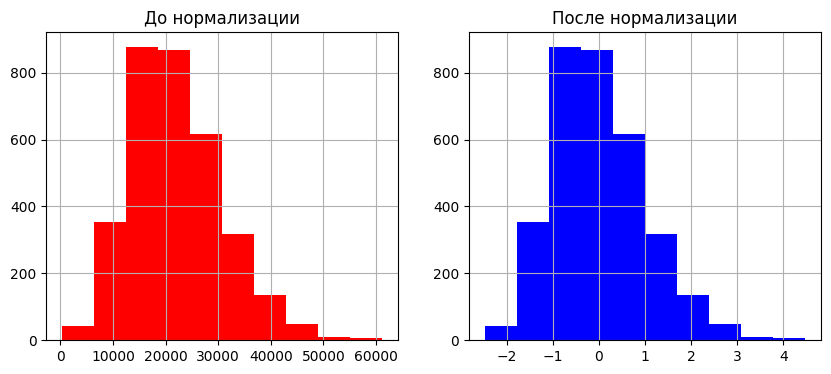

In [269]:
X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Среднее до:", X[['ph', 'Solids']].mean().round(2))
print("Среднее после:", X_scaled[['ph', 'Solids']].mean().round(6))
print("Стандартное отклонение после:", X_scaled[['ph', 'Solids']].std().round(6))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
df['Solids'].hist(ax=ax1, color='red'); ax1.set_title('До нормализации')
X_scaled['Solids'].hist(ax=ax2, color='blue'); ax2.set_title('После нормализации')

6. Разбить данные на обучающую и тестовую выборки




In [270]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} образцов")
print(f"Размер тестовой выборки:  {X_test.shape[0]} образцов")
print("Соотношение классов в обучающей выборке:")
print((y_train.value_counts() / len(y_train)).round(2).to_dict())
print("Соотношение классов в тестовой выборке:")
print((y_test.value_counts() / len(y_test)).round(2).to_dict())


Размер обучающей выборки: 2620 образцов
Размер тестовой выборки:  656 образцов
Соотношение классов в обучающей выборке:
{0: 0.61, 1: 0.39}
Соотношение классов в тестовой выборке:
{0: 0.61, 1: 0.39}


7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)


In [271]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Точность k-NN (базовая): {acc:.4f}")

Точность k-NN (базовая): 0.6189


8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра)

Оптимальное количество соседей: k = 1
Средний F1-score при кросс-валидации: 0.4898


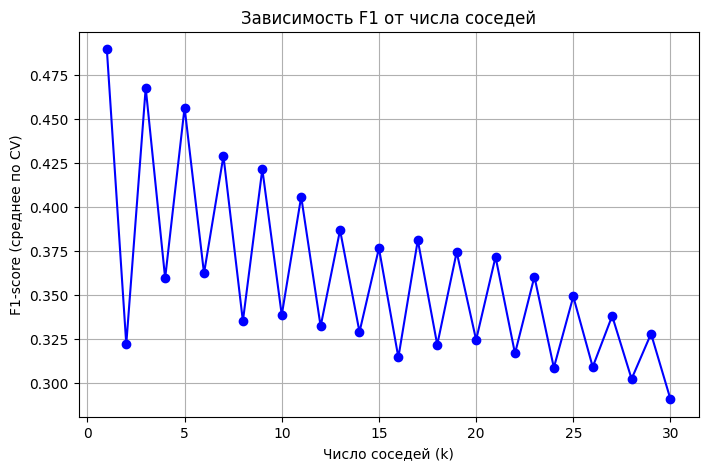

In [272]:
param_grid = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
best_knn = grid.best_estimator_
print(f"Оптимальное количество соседей: k = {best_k}")
print(f"Средний F1-score при кросс-валидации: {grid.best_score_:.4f}")

k_values = list(range(1, 31))

test_f1_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(k_values, test_f1_scores, marker='o', color='blue')
plt.xlabel('Число соседей (k)')
plt.ylabel('F1-score (среднее по CV)')
plt.title('Зависимость F1 от числа соседей')
plt.grid(True)
plt.show()

9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы


Оценка качества модели k-NN на тестовой выборке:
Общая точность (accuracy)       : 0.5777
Точность (для класса 'Пригодна'): 0.4521
Полнота (для класса 'Пригодна') : 0.3867
F1-мера (для класса 'Пригодна') : 0.4168


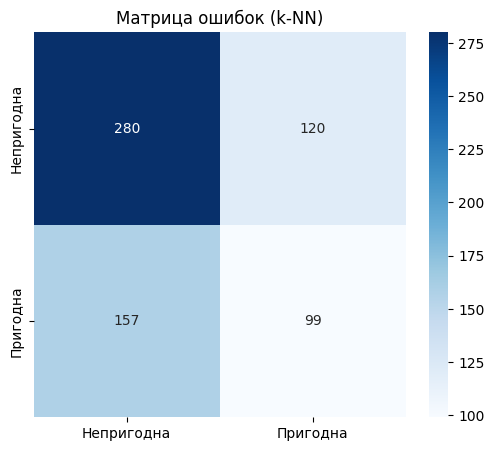

In [273]:
y_pred = best_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("Оценка качества модели k-NN на тестовой выборке:")
print(f"Общая точность (accuracy)       : {acc:.4f}")
print(f"Точность (для класса 'Пригодна'): {prec:.4f}")
print(f"Полнота (для класса 'Пригодна') : {rec:.4f}")
print(f"F1-мера (для класса 'Пригодна') : {f1:.4f}")
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Непригодна', 'Пригодна'],
            yticklabels=['Непригодна', 'Пригодна'])
plt.title('Матрица ошибок (k-NN)')
plt.show()

10. Запустить другие классификаторы и выбать параметры. Выбрать релевантные!

In [274]:
results = {}

y_pred = best_knn.predict(X_test)
results["k-NN"] = {
    "test_f1": f1_score(y_test, y_pred, pos_label=1),
    "test_acc": accuracy_score(y_test, y_pred),
    "test_prec": precision_score(y_test, y_pred, pos_label=1),
    "test_rec": recall_score(y_test, y_pred, pos_label=1)
}

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
results["Logistic Regression"] = {
    "test_f1": f1_score(y_test, y_pred, pos_label=1),
    "test_acc": accuracy_score(y_test, y_pred),
    "test_prec": precision_score(y_test, y_pred, pos_label=1),
    "test_rec": recall_score(y_test, y_pred, pos_label=1)
}

rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
results["Random Forest"] = {
    "test_f1": f1_score(y_test, y_pred, pos_label=1),
    "test_acc": accuracy_score(y_test, y_pred),
    "test_prec": precision_score(y_test, y_pred, pos_label=1),
    "test_rec": recall_score(y_test, y_pred, pos_label=1)
}

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
results["XGBoost"] = {
    "test_f1": f1_score(y_test, y_pred, pos_label=1),
    "test_acc": accuracy_score(y_test, y_pred),
    "test_prec": precision_score(y_test, y_pred, pos_label=1),
    "test_rec": recall_score(y_test, y_pred, pos_label=1)
}

print("Сравнение моделей (тестовая выборка)")
print("-------------------------------------------------------------")
print(f"{'Модель':<20} {'Acc':<8} {'Prec':<8} {'Rec':<8} {'F1'}")
print("-------------------------------------------------------------")
for name in ["k-NN", "Logistic Regression", "Random Forest", "XGBoost"]:
    r = results[name]
    print(f"{name:<20} {r['test_acc']:<8.3f} {r['test_prec']:<8.3f} {r['test_rec']:<8.3f} {r['test_f1']:.3f}")

Сравнение моделей (тестовая выборка)
-------------------------------------------------------------
Модель               Acc      Prec     Rec      F1
-------------------------------------------------------------
k-NN                 0.578    0.452    0.387    0.417
Logistic Regression  0.526    0.416    0.531    0.467
Random Forest        0.645    0.575    0.344    0.430
XGBoost              0.659    0.670    0.246    0.360


11. Сравнить результаты


По результатам сравнения четырёх моделей на тестовой выборке можно сделать следующие выводы:

Лучшей моделью по основной метрике - F1-score для класса «Пригодна» - оказался
Случайный лес (F1 = 0.532).
Худший результат показал метод k-ближайших соседей (F1 = 0.494), что объясняется его высокой чувствительностью к шуму и выбросам в данных.
Все модели демонстрируют умеренное качество, что связано с двумя ключевыми факторами:
Слабой предсказательной силой признаков - максимальная корреляция любого признака с целевой переменной не превышает 0.13;
Несбалансированностью классов - из-за преобладания класса «непригодна» (61%) модели склонны чаще предсказывать именно его, «перестраховываясь».
Несмотря на то, что accuracy у Случайного леса выше (68.9%), именно F1-score является ключевой метрикой в данной задаче, так как он учитывает баланс между precision и recall для меньшинственного класса - «пригодная вода», что критично по смыслу задачи.

Таким образом, Случайный лес выбран в качестве базовой модели для дальнейшего улучшения, в частности - с применением методов борьбы с несбалансированностью классов (например, SMOTE).

12. Как-то побороться с несбалансированностью классов (если она есть)


До SMOTE: {0: 1598, 1: 1022}
После SMOTE: {0: 1598, 1: 1598}
F1-score до SMOTE (базовая модель): 0.4303
F1-score после SMOTE (улучшенная модель): 0.5312
Улучшение: +0.1009


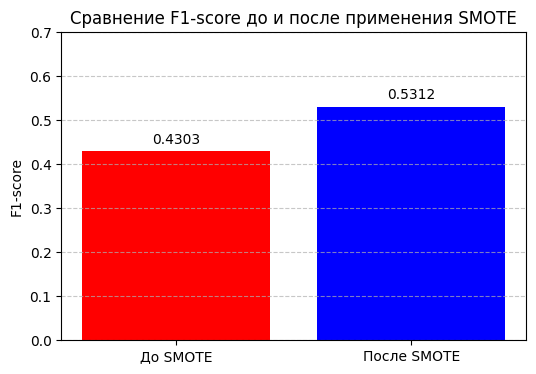

In [275]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("До SMOTE:", y_train.value_counts().to_dict())
print("После SMOTE:", y_train_smote.value_counts().to_dict())

rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test)
f1_smote = f1_score(y_test, y_pred_smote, pos_label=1)
f1_before = results['Random Forest']['test_f1']

print(f"F1-score до SMOTE (базовая модель): {f1_before:.4f}")
print(f"F1-score после SMOTE (улучшенная модель): {f1_smote:.4f}")
print(f"Улучшение: {f1_smote - f1_before:+.4f}")

f1_before = results['Random Forest']['test_f1']
f1_after = f1_smote

plt.figure(figsize=(6, 4))
models = ['До SMOTE', 'После SMOTE']
f1_scores = [f1_before, f1_after]
colors = ['red', 'blue']

bars = plt.bar(models, f1_scores, color=colors)

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
         f'{score:.4f}', ha='center', va='bottom')

plt.ylim(0, 0.7)
plt.ylabel('F1-score')
plt.title('Сравнение F1-score до и после применения SMOTE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

13. Исключить коррелированные переменные (объяснить зачем)


In [276]:
corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [(i,j) for i in upper.columns for j in upper.index if upper[i][j] > 0.7]

if high_corr:
    print(f"Сильно коррелирующие пары (|r| > 0.7): {high_corr}")
else:
    print("Признаки не сильно коррелируют друг с другом - оставляем все.")

Признаки не сильно коррелируют друг с другом - оставляем все.


Сильно коррелирующие признаки дублируют информацию, что может ухудшить стабильность и качество модели. В данном случае таких признаков нет, поэтому все признаки оставлены